## Real-world data representation using tensors

![RealWorldData](../assets//Always-Has-Been.png)

🤔: how do we take a piece of data, a video, or a line of text, and represent it with a tensor in a way that is appropriate for training a deep learning model?
- Picture is worth of thousand words
- tabular dataset
- ordered tabular dataset (timeseries)
- text (retains its ordered aspect but introduces the problem of representing words as arrays of numbers)


# 🪞IMAGE

In [2]:
import imageio
from torchvision.transforms import Resize
from torchvision.io import read_image
import torch 

img = imageio.imread('../assets/sippiparai-dog-breed-tamilnadu.jpg')
print(img.shape)

# img is a NumPy array-like object with three dimensions: two spatial dimensions, width and height; and a third dimension corresponding to the RGB channels.
# PyTorch modules dealing with image data require tensors to be laid out as C × H × W : channels, height, and width, respectively. 
# Create a dataset of multiple images to use as an input for our neural networks, we store the images in a batch along the first dimension to obtain an N × C × H × W tensor

In [ ]:
import os
from matplotlib import pyplot as  plt 

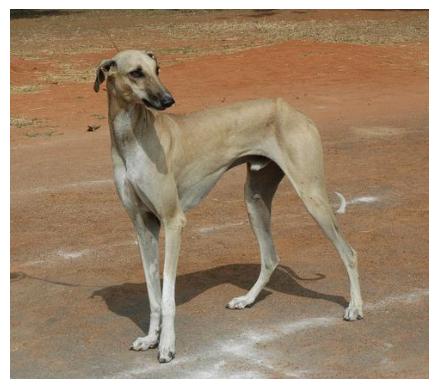

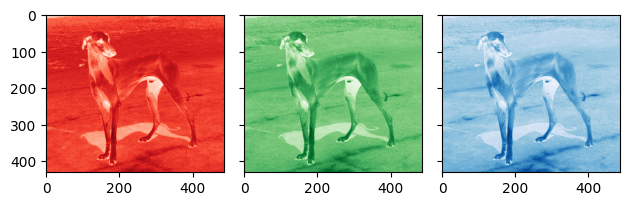

In [ ]:

plt.imshow(img)
plt.axis('off')
plt.show()

fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey='all',tight_layout=True)
ax1.imshow(img[:,:,0],cmap="Reds")
ax2.imshow(img[:,:,1],cmap='Greens')
ax3.imshow(img[:,:,2],cmap="Blues")
plt.show()

We've so many [color_model](https://en.wikipedia.org/wiki/Color_model)
- Munsell
- HSL
- HSV
- CIE
- XYZ


In [ ]:
from torchvision.transforms import Resize

In [ ]:
r = Resize(size=(224,224))
num_imgs = 3

batch = torch.zeros(num_imgs,3,224,224,dtype=torch.float32)
for idx,i in enumerate(os.listdir('../assets/img-dog/')):
    t_=r(read_image(f'../assets/img-dog/{i}'))
    batch[idx] +=t_.type_as(batch)

batch /= 255.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 3, 224, 224])


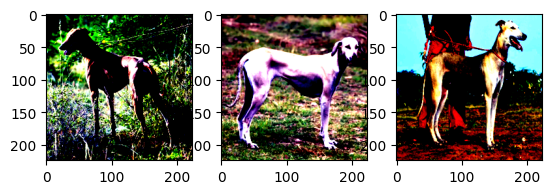

In [ ]:
mean = batch.mean(dim=(0,2,3))
std  = batch.std(dim=(0,2,3))

batch =( batch - mean.view(1,3,1,1)) / std.view(1,3,1,1)

print(batch.shape) # N,C,H,D

# For volume metric data, there’s no fundamental difference between a tensor storing volumetric data versus image data.
# N * C * D * H * W  (5D)

fig,axs = plt.subplots(1,3)
for i,ax in zip(range(batch.shape[0]),axs):
    axs[i].imshow(batch[i].permute(1,2,0).numpy())
plt.show()

![read_dcm](../assets/read%20pydcm.png)

In [ ]:
import imageio
vol_arr = imageio.volread('../assets/volumetric-dicom-LUNGS','DICOM')
print(vol_arr.shape)

Reading DICOM (examining files): 1/3 files (33.3%3/3 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 3/3  (100.0%)
(3, 512, 512)


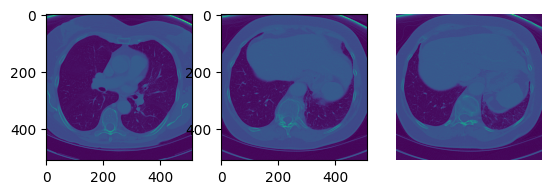

In [ ]:
fig,axs = plt.subplots(1,3)
for i,ax in zip(range(vol_arr.shape[0]),axs):
    axs[i].imshow(vol_arr[i])
plt.axis('off')
plt.show()


# ☑️ Tabular Data

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
wine_equality = np.loadtxt('../assets/winequality-white.csv',dtype=np.float32,delimiter=";",skiprows=1)
df = pd.read_csv('../assets/winequality-white.csv',sep=';')


wineq = torch.from_numpy(df.values)
print(wineq.shape, wineq.dtype)

torch.Size([4898, 12]) torch.float64


**[Level of Measurement](https://en.wikipedia.org/wiki/Level_of_measurement)** Continuous, ordinal, and categorical values 

Three Kind of Numerical Value
- continous (strict order and difference btwn values matters)
- ordinal (strict order and relationship btwn values no longer applies) i.e)It’s important to remember that we can’t “do math” on the values outside of ordering them
- categorical (neither ordering and nor numerical) (advantage of OHE and embedding)

![ohe](../assets/ohe.png)

In [ ]:
data = wineq[:,:-1]
target = wineq[:,-1]   # string assigning integer number to each it

print(target.shape, target.dtype, target.unique())

data_normalized = data-data.mean(dim=0)/ data.std(0)

torch.Size([4898]) torch.float64 tensor([3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64)


## OHE

encode each of the 10 scores in a vector of 10 elements, with all elements set to 0 but one, at a different index for each score
e.g)

1 -> (1,0,0,0,0,0,0,0,0,0)

2 -> (0,1,0,0,0,0,0,0,0,0)

3 -> (0,0,1,0,0,0,0,0,0,0)


In [ ]:
ohe_target = torch.eye(10)[target.numpy()]
# If target is a 1D array of length n, the output shape would be (n, 10) because each value in the target array corresponds to selecting one row from the 10x10 identity matrix.

r = torch.rand(5,).mul(target.shape[0]).int()
for idx,i in enumerate(zip(ohe_target[r],target[r])):
    print(i[0],i[1].item())

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]) 6.0
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]) 6.0
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]) 5.0
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]) 6.0
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]) 6.0


In [ ]:
bad_data = data[target<=3];             bad_data_mean = bad_data.mean(0)
mid_data = data[(target>3)&(target<7)]; mid_data_mean = mid_data.mean(0) 
good_data= data[target>7];              good_data_mean = good_data.mean(0)

In [ ]:
print(f"idx:: {'column_name':30}{'bad_mean':20}\t{'mid_mean':20}\t{'good_mean'}")

for idx,col,bad_mean,mid_mean,good_mean in zip(range(12),df.columns[:-1],bad_data_mean,mid_data_mean,good_data_mean):
    print(f"{idx}:: {col:30}{bad_mean.item():20}\t{mid_mean.item():20}\t{good_mean.item()}")

idx:: column_name                   bad_mean            	mid_mean            	good_mean
0:: fixed acidity                                  7.6	   6.886877946568884	6.678333333333333
1:: volatile acidity               0.33325000000000005	  0.2815322158198009	0.2779722222222222
2:: citric acid                                  0.336	  0.3364405447878471	0.32816666666666666
3:: residual sugar                              6.3925	   6.705107386066004	5.628333333333334
4:: chlorides                     0.054299999999999994	 0.04784101623886853	0.03801111111111112
5:: free sulfur dioxide                         53.325	  35.424044002095336	36.62777777777778
6:: total sulfur dioxide                         170.6	  141.83302776322682	125.88333333333334
7:: density                         0.9948840000000001	  0.9944713750654792	0.9922143888888889
8:: pH                                          3.1875	  3.1808119434258773	3.2211666666666665
9:: sulphates                       0.4744999999999999	 0.

# Time Series ⌚
- The existence of an ordering gives us the opportunity to exploit causal relationships across time

idea of how a time series is laid out and how we can wrangle the data in a form that a network will digest. here, Our goal will take a 2D dataset transform into 3D one 

In [ ]:
bikes_numpy = np.loadtxt(
    '../assets/hour.csv',
    dtype=np.float32,
    delimiter=',',
    skiprows=1,
    converters={1: lambda x: float(x[8:10])} #converts date string to numbers corresponding to day of the month in column 1
)

# For every hour, the dataset reports the following variables:
#      Index of record: instant
#      Day of month: day
#      Season: season (1: spring, 2: summer, 3: fall, 4: winter)
#      Year: yr (0: 2011, 1: 2012)
#      Month: mnth (1 to 12)
#      Hour: hr (0 to 23)
#      Holiday status: holiday
#      Day of the week: weekday
#      Working day status: workingday
#      Weather situation: weathersit (1: clear, 2:mist, 3: light rain/snow, 4: heavy
#     rain/snow)
#      Temperature in °C: temp
#      Perceived temperature in °C: atemp
#      Humidity: hum
#      Wind speed: windspeed
#      Number of casual users: casual
#      Number of registered users: registered
#      Count of rental bikes: cnt


bikes = torch.from_numpy(bikes_numpy)
print(bikes.shape)  #17 columns

torch.Size([17520, 17])


In [ ]:
daily_bikes = bikes.view(-1,24,bikes.shape[1])
print(daily_bikes.shape)  #number of rows = 1 days   #730/365(yr) = 2(no of years)


# calling view on a tensor returns a new tensor that changes the number of dimensions and the striding information, without changing the storage.

torch.Size([730, 24, 17])


In [ ]:
daily_bikes = daily_bikes.transpose(1,2)
print(daily_bikes.shape)

torch.Size([730, 17, 24])


In [ ]:
first_day = bikes[:24].long()
print(f"first day bike shape: {first_day.shape}")

first_day[:,9] #weather (1: clear, 2:mist, 3: light rain/snow, 4: heavy rain/snow)'

weather_onehot = torch.zeros(first_day.shape[0],4)
weather_onehot.scatter_(
    dim=1,
    index= first_day[:,9].unsqueeze(1).long()-1, # weather situation range from 1-4 not 0-based
    value=1.0
)
print(f"weather one hot: {weather_onehot.shape}")

first_day_matrix = torch.cat((bikes[:24], weather_onehot), dim=1)
print(f"first day matrix: {first_day_matrix.shape}")

first day bike shape: torch.Size([24, 17])
weather one hot: torch.Size([24, 4])
first day matrix: torch.Size([24, 21])


In [ ]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2])
daily_weather_onehot.scatter_( dim=1, index=daily_bikes[:,9,:].long().unsqueeze(1) - 1, value=1.0)
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

daily_bikes.shape

torch.Size([730, 21, 24])

# Text 🔠

great strom in NLP
- text categorization
- text generation
- machine translation

Part I #  Converting text to numbers

In [ ]:
with open('../assets/1342-0.txt', encoding='utf8') as f:
    text = f.read()

In [ ]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [ ]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

In [ ]:
words_in_line:list  = clean_words(line)
print(words_in_line)

['impossible', 'mr', 'bennet', 'impossible', 'when', 'i', 'am', 'not', 'acquainted', 'with', 'him']


In [ ]:
print("TEXT:\n",text)

word_list = sorted(set(clean_words(text)))
print(word_list)

TEXT:
 ﻿The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Pride and Prejudice

Author: Jane Austen

Posting Date: August 26, 2008 [EBook #1342]
Release Date: June, 1998
Last Updated: March 10, 2018

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***




Produced by Anonymous Volunteers





PRIDE AND PREJUDICE

By Jane Austen



Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered th

In [ ]:
word2idx_dict = {}
for (i,word) in enumerate(word_list):
    print(i,word)
    word2idx_dict[word] =i


print("total words: ",len(word2idx_dict))

0 
1 #1342]
2 $5,000)
3 '_she
4 'after
5 'ah
6 'as-is'
7 'bingley
8 'had
9 'having
10 'i
11 'keep
12 'lady
13 'lately
14 'lydia
15 'mr
16 'my
17 'oh
18 's
19 'this
20 'tis
21 'violently
22 'yes,'
23 'you
24 ($1
25 (801)
26 (a)
27 (an
28 (and
29 (any
30 (available
31 (b)
32 (by
33 (c)
34 (comparatively
35 (does
36 (for
37 (glancing
38 (if
39 (lady
40 (like
41 (most
42 (my
43 (or
44 (trademark/copyright)
45 (unasked
46 (what
47 (who
48 (www.gutenberg.org)
49 (“the
50 *
51 ***
52 *****
53 1
54 1.a
55 1.b
56 1.c
57 1.d
58 1.e
59 1.e.1
60 1.e.2
61 1.e.3
62 1.e.4
63 1.e.5
64 1.e.6
65 1.e.7
66 1.e.8
67 1.e.9
68 1.f
69 1.f.1
70 1.f.2
71 1.f.3
72 1.f.4
73 1.f.5
74 1.f.6
75 10
76 11
77 12
78 13
79 1342-0.txt
80 1342-0.zip
81 14
82 15
83 1500
84 15th
85 16
86 17
87 18
88 18th
89 19
90 1998
91 2
92 20
93 20%
94 2001
95 2008
96 2018
97 21
98 22
99 23
100 24
101 25
102 26
103 26th
104 27
105 28
106 29
107 3
108 30
109 31
110 32
111 33
112 34
113 35
114 36
115 37
116 38
117 39
118 4
119 40
120 41
121

In [ ]:
word_t = torch.zeros(len(words_in_line),len(word2idx_dict))
print(word_t.shape)

for i,word in enumerate(words_in_line):
    word_idx = word2idx_dict[word]
    word_t[i][word_idx] = 1
    print('{:2} {:4} {}'.format(i,word_idx,word))

torch.Size([11, 7261])
 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him


the byte pair encoding method stands between character and word level.

In English, a vocabulary of something like 30,000 words works pretty well for this kind of bag-of-words model.

Text or categorical data can be encoded to a one-hot representation through the use of dictionaries. Very often, embeddings give good, efficient representations

Later we'll see Word2Vec, Embedding